
# **ANA 680 Week 2 Homework Assignment**
## Leticia Genao
## 05/21/24

### Breast Cancer Detection with Logreg


In [80]:
#Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
import pickle


# Read in file
path = './data/Breast_Cancer_Prediction.csv'
df=pd.read_csv(path)

# Data Exploration

# Show all the data
print("Basic DataFrame information:")
print(df.info())
print(df)

# Show the first five rows of the DataFrame
df.head()

Basic DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB
None
     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025 

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [81]:
# Show Summary statistics for the DataFrame
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000



#**Notes**

***Bare Nuclei***
  * Has a larger range and a higher standard deviation, suggesting substantial variability that may be important in determining the malignancy of a cancer. Given that the mean is greater than many other attributes, it is likely a shared characteristic of the samples offered.
  
***Clump Thickness, Uniformity of Cell Size, and Uniformity of Cell Shape*** 
  * Compared to other parameters, such as mitoses, these features have larger averages, indicating variation in cell clumpiness and uniformity that may be directly related to the severity of the malignancy. Further investigation is needed.



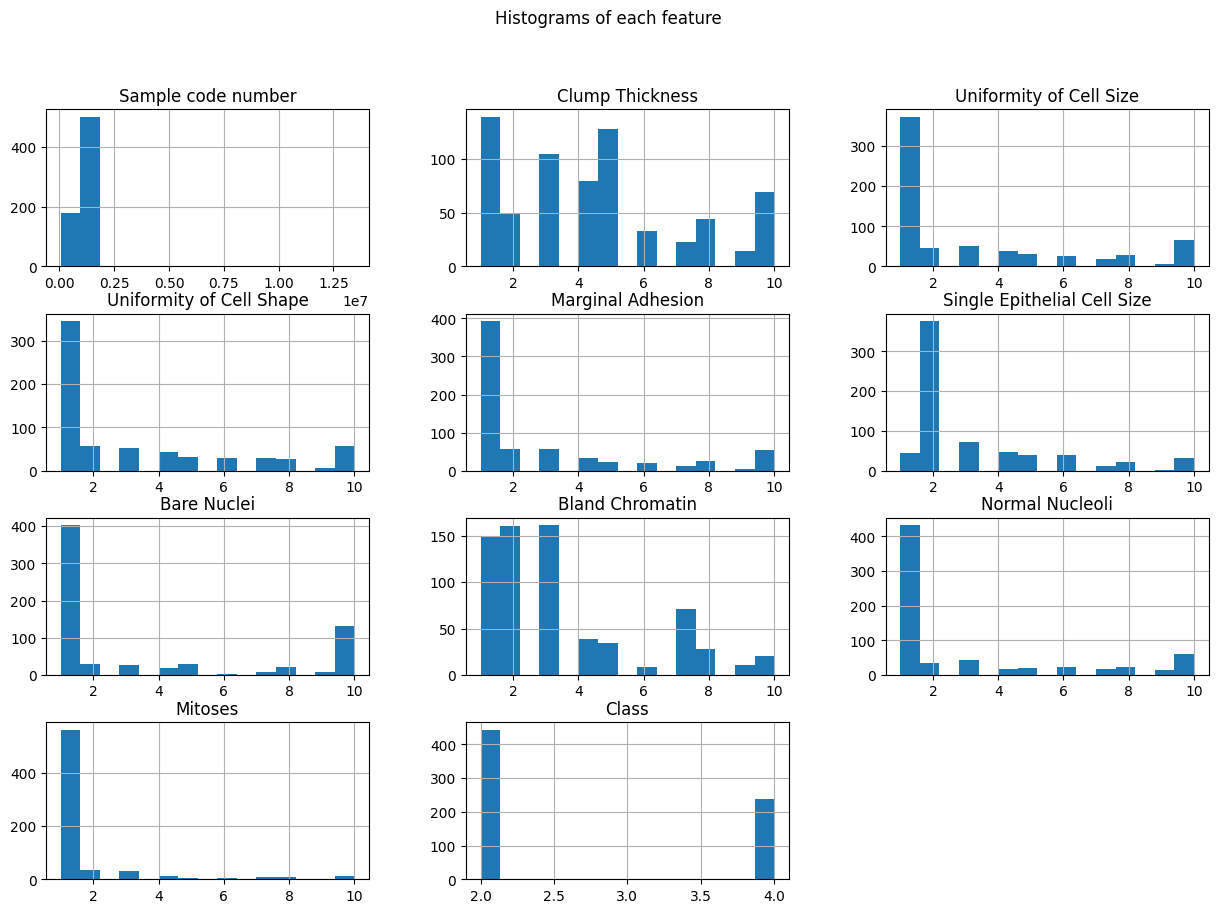

In [82]:
# Histograms for each feature
df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of each feature')
plt.show()

#**Notes**

***Bi-modal Distributions***
  * Bi-modal distributions for "Clump Thickness" and "Uniformity of Cell Size" suggest that there may be two different groups in the sample, potentially reflecting benign and malignant tumors.
  
  
***Skewed Distributions***
  * The feature "Mitoses" has a strong negative bias, indicating that high rates of mitosis are uncommon and, when they do occur, may be reliable markers of cancer.


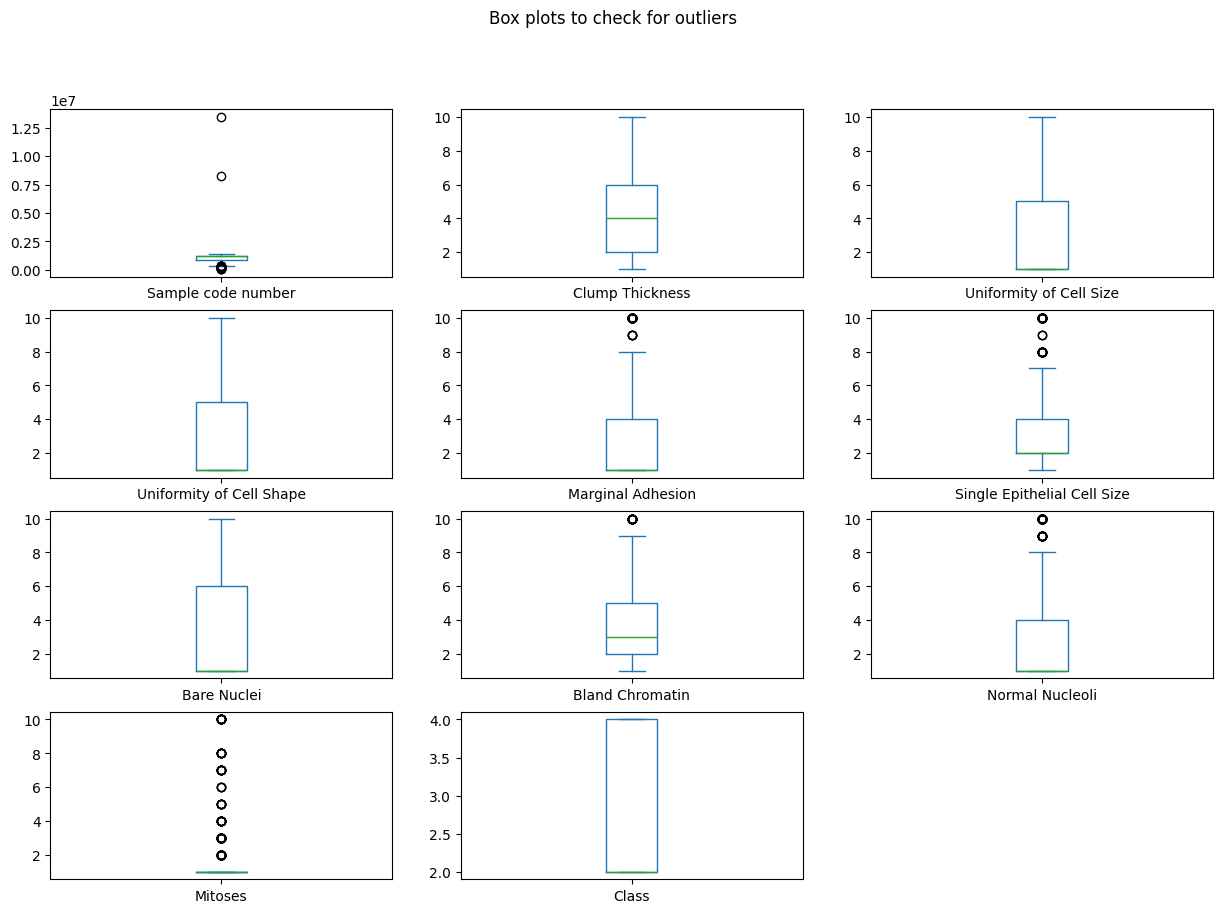

In [83]:
# Box plots to check for outliers
df.plot(kind='box', subplots=True, layout=(4, 3), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Box plots to check for outliers')
plt.show()



#**Notes**

***Outliers***
  * There are a lot of outliers in several features. As previously indicated, 'Mitoses', for instance, exhibits a large number of values that are much above the primary data cluster and may be powerful indications of cancer.
  
***Bare Nuclei and Bland Chromatin***
  * These features show samples with extreme values that may be important in differentiating between benign and malignant classes, as they have a large number of outliers over the upper quartile.



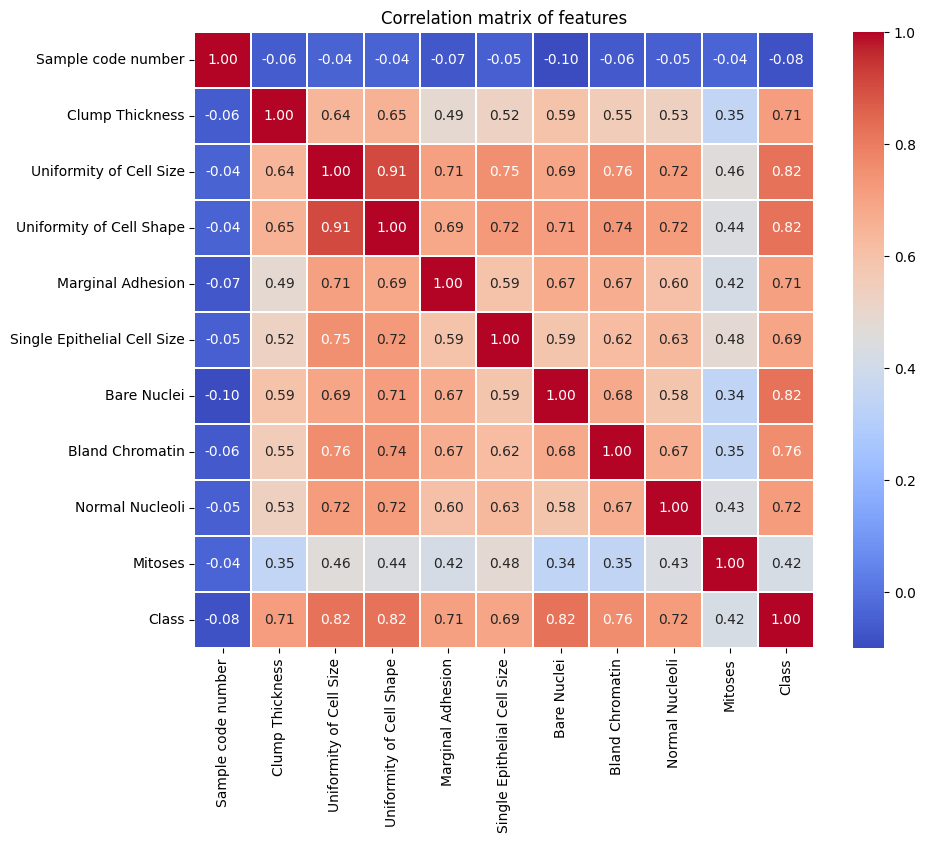

In [84]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation matrix of features')
plt.show()


#**Notes**

***High Correlations***
  * 'Uniformity of Cell Size' and 'Uniformity of Cell Shape' are two of the highly correlated pairings (0.91). A high correlation between these traits and probable duplicate information shows that dimensionality reduction may be possible without a large loss of information.
  
***Negative Correlations***
  * The majority of cellular properties either rise or decrease together, as evidenced by the very small number of measures that exhibit negative correlations and those that do not exhibit strong negative correlations.


# **Data Cleaning and Preprocessing**

In [85]:
# Converting column names to snake_case for consistency and easier coding
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Dropping non-predictive column
df.drop('sample_code_number', axis=1, inplace=True)

# Ensure all data types are correct, converting if necessary
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'], errors='coerce')
df.dropna(subset=['bare_nuclei'], inplace=True)  # Dropping any rows with NaN values which can happen if conversion fails

# Converting 'Class' from 2,4 to 0,1
df['class'] = df['class'].replace({2: 0, 4: 1})

# Check
print(df.columns)
df.head()

Index(['clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')


,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [86]:
# Prepare the data
X = df.drop(['class'], axis=1) # Drop the target
y = df['class'] # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modeling & Evaluation


# Defining a pipeline 
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Include a scaler
    ('logistic', LogisticRegression(max_iter=200))
])

# Define the parameter grid to test
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2'],
    'logistic__solver': ['liblinear', 'saga'],
    'logistic__max_iter': [100, 200, 300],
    'logistic__tol': [0.0001, 0.001, 0.01]
}

# Setup the GridSearchCV object
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Using the best estimator to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters found: {'logistic__C': 0.1, 'logistic__max_iter': 100, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear', 'logistic__tol': 0.0001}
Best cross-validation score: 0.97
Accuracy: 0.9649122807017544
Confusion Matrix:
[[102   1]
 [  5  63]]


### Notes
- Model precision and regularization should be balanced, according to the logistic regression model's optimum parameters. In order to improve generalization and lessen overfitting while preserving significant predictors, the model uses mild Ridge regularization (l2 penalty) with C=0.1. Because of its efficiency and fit to the size and complexity of the dataset, the liblinear solver is recommended. For this procedure, max_iter=100 works well, and a very small tolerance (tol=0.0001) enables accurate convergence. Strong performance and generalizability are demonstrated by the robust model that results from these settings, which also has good cross-validation (0.97) and test accuracy (0.964).
  

Confusion Matrix:


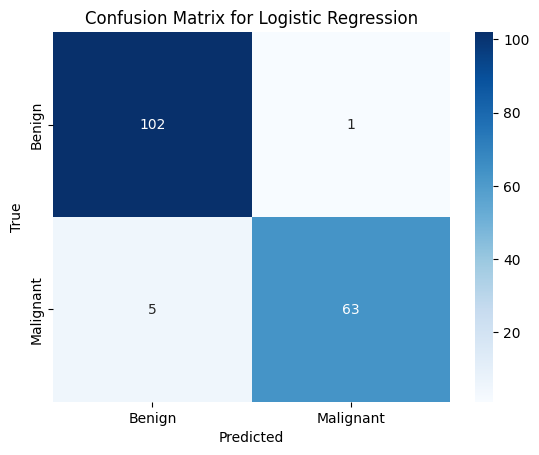

In [87]:
#Plot
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [88]:
# Save the best model
pickle.dump(best_model, open('model.pkl', 'wb'))